In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

voters=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv')

The purpose of this project is to examine US voter registration trends at both a national and state level. The goal of this project is to shine light on key insights that could help us understand recent trends on voter registration and provide visualizations that easily show these trends. It is important for someone to read this notebok because it will help show the process in order to find these keys insights and visualizations for voter registration which is a super important factor in US politics.

Question 1: Was there an increase in voter registration from 2016 to 2020?

Question 2: What month has the highest voter registration in Illinois?

In [ ]:
voters.head()

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The dataset contrains four variables

Jurisdiction- A categorical variable which contains US states

Year- A categorical variable which is either 2016 or 2020

Month- A categorical variable which is either January, February, March, or April

New Registered Voters- A numeric variable which represents how many new registered voters that corresponding sate had in the correpsoing month of the corresponding year

In [ ]:
voters.isnull().values.any()

False

The dataset has no missing values

In [ ]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Jurisdiction and Month are both string variables while Year and new registered voters are integers

In [4]:
voters.rename(columns={"Jurisdiction": "Name"}, inplace=True)
voters.rename(columns={"New registered voters": "registered_voters"}, inplace=True)

Renaming two of the columns to more easily reference them throughout the rest of the notebook

There are a number of limitations to the data. One is we are using raw registered voters instead of registered voters per capita so bigger states will often have a much higher amount of new registered voters even if there having new voters register at a slower rate then other states.

In [ ]:
voters.sort_values(by="registered_voters", ascending=False).head(1)

,Name,Year,Month,registered_voters
13,California,2020,Feb,238281


The time of highest new voters registration was in California during Februrary 2020 with 238,281 new registered voters.

In [ ]:
print(voters["registered_voters"].mean().round(0))

48223.0


The average new registered voters was 48,223 in a month across all states

In [ ]:
high_voters= voters.loc[voters.registered_voters >48223]
high_voters.shape

(36, 4)

There are 36 months where voter registration was above average

In [ ]:
high_voters.groupby("Name").size()

,0
Name,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


Texas went above the average eight times, California and Florida did it seven times, North Carolina did it six times, Illinois did it four times, Arizona did it three times, and Georgia did it once.

In [ ]:
average=voters.groupby("Name")["registered_voters"].mean().round(0).reset_index()
average.sort_values(by ="registered_voters", ascending=False).head(3)

,Name,registered_voters
1,California,144545.0
10,Texas,114610.0
5,Florida,65868.0


California, Texas, and Florida have the three highest voter registrations

<Figure size 1000x1000 with 0 Axes>

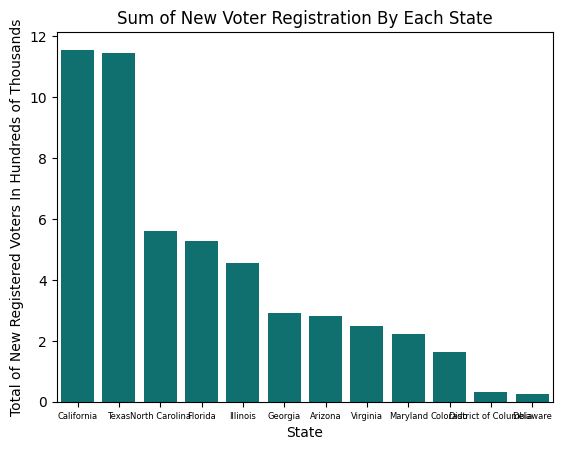

<Figure size 1000x1000 with 0 Axes>

In [ ]:
total=voters.groupby("Name")["registered_voters"].sum()/1e5
total=total.reset_index()
total=total.sort_values(by='registered_voters', ascending=False)
sns.barplot(total, x="Name", y="registered_voters", color='teal')
plt.xticks(fontsize=6)
plt.title("Sum of New Voter Registration By Each State")
plt.xlabel("State")
plt.ylabel("Total of New Registered Voters In Hundreds of Thousands")
plt.figure(figsize=(10,10))



From the graph we can see that California and Texas have a significantly higher (almost double) voter registration from every other state. We can also see D.C and Deleware are outliers in there significantlly small amount of voter registration numbers.

In [74]:
total_2020=voters.loc[voters.Year==2020]
total_2020= total_2020.groupby("Month")["registered_voters"].sum()
order=[2,1,3,0,4]
total_2020=total_2020.iloc[order]
total_2016=voters.loc[voters.Year==2016]
total_2016= total_2016.groupby("Month")["registered_voters"].sum()
order2=[2,1,3,0,4]
total_2016=total_2016.iloc[order2]
total_2016=total_2016.reset_index()
total_2020=total_2020.reset_index()

Creating dataframes to get the monthly total of registered voters in both 2016 and 2020, Since Month is in a strin and not datetime format I need to manually reorder the rows so they are in chronological order

<Figure size 1000x1000 with 0 Axes>

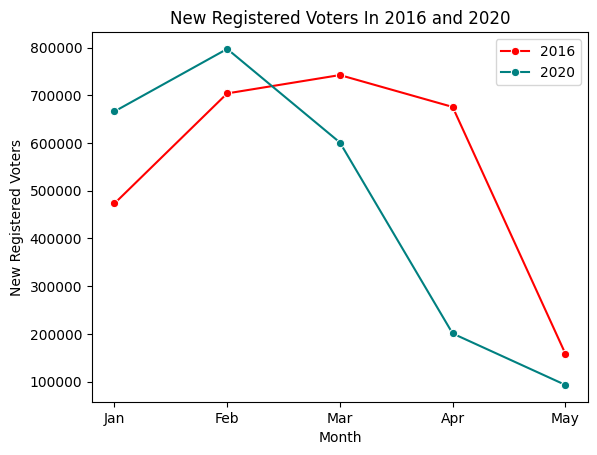

<Figure size 1000x1000 with 0 Axes>

In [79]:
sns.lineplot(x='Month', y='registered_voters', data=total_2016, label='2016', marker='o', color='red')
sns.lineplot(x='Month', y='registered_voters', data=total_2020, label='2020', marker='o', color='teal')
plt.title("New Registered Voters In 2016 and 2020")
plt.xlabel("Month")
plt.ylabel("New Registered Voters")
plt.figure(figsize=(10,10))

Text(0, 0.5, 'New Registered Voters (in millions)')

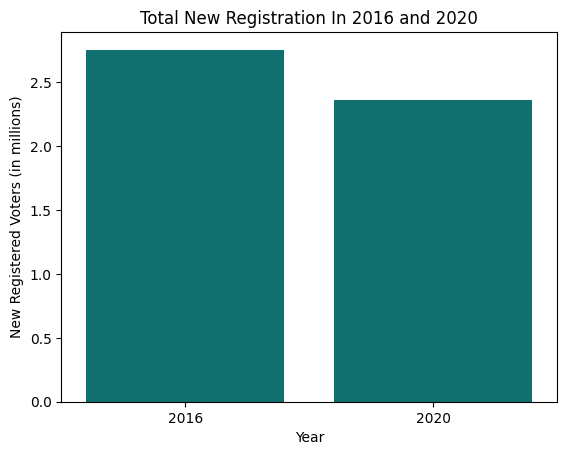

In [88]:
total=voters.groupby("Year")["registered_voters"].sum()/1e6
total=total.reset_index()
sns.barplot(total, x="Year", y="registered_voters", color='teal')
plt.title("Total New Registration In 2016 and 2020")
plt.xlabel("Year")
plt.ylabel("New Registered Voters (in millions)")

The graph shows that in the first two months 2020 had a higher voter registration, but once march hit 2020's new registered voters fell substatially dude to the COVID pandemic while 2016's stayed steady until falling off in May. Thats why in the second graph we see 2016 has a much higher total of new registered voters.

<Figure size 1000x1000 with 0 Axes>

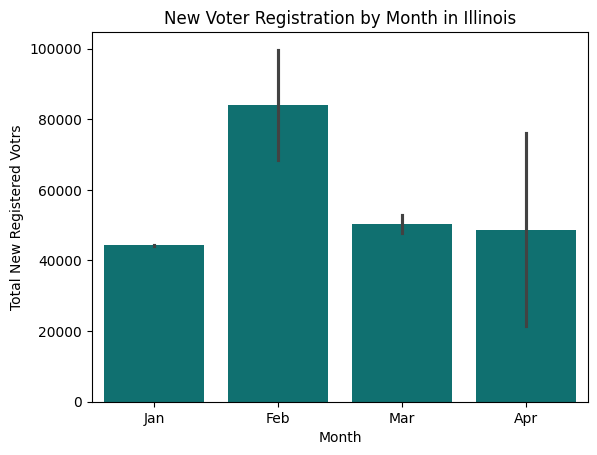

<Figure size 1000x1000 with 0 Axes>

In [7]:
illinois=voters.loc[voters.Name=="Illinois"]
illinois.groupby("Month")["registered_voters"].sum().reset_index()
sns.barplot(data=illinois, x="Month", y="registered_voters", color='teal')
plt.title("New Voter Registration by Month in Illinois")
plt.xlabel("Month")
plt.ylabel("Total New Registered Votrs")
plt.figure(figsize=(10,10))

This graph shows that February had the most new voters registered when you combine totals in 2016 and 2020 answering reseearch question number two

In [11]:
!git clone https://github.com/SFord87/325-Datasets
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'
states = gpd.read_file(shapefile)
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

fatal: destination path '325-Datasets' already exists and is not an empty directory.


Next, I will load in a dataset with geographical data, then set our viewpoint so we just see the United States and in a reasonable frame,

In [15]:
average=voters.groupby("Name")["registered_voters"].mean().round(0)
average

,registered_voters
Name,
Arizona,35312.0
California,144545.0
Colorado,20528.0
Delaware,3166.0
District of Columbia,3248.0
Florida,65868.0
Georgia,36604.0
Illinois,56840.0
Maryland,22134.0


The dataframe above represents the average new registered voters per month in each state.

In [19]:
bbox.rename(columns={"NAME": "Name"}, inplace=True) #changing the capitalization of the name column in the geographical data to be the same as the voters df so I can merge them

<ipython-input-19-3cafadf363a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbox.rename(columns={"NAME": "Name"}, inplace=True)


In [23]:
combined=bbox.merge(average, on="Name", how="inner")
combined.head(3)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,Name,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56041.0
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.0
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.0


Here I am combining the dataframe with geographical data with the average registered voters dataframe so I can do cartogrophy with the registered voters data.

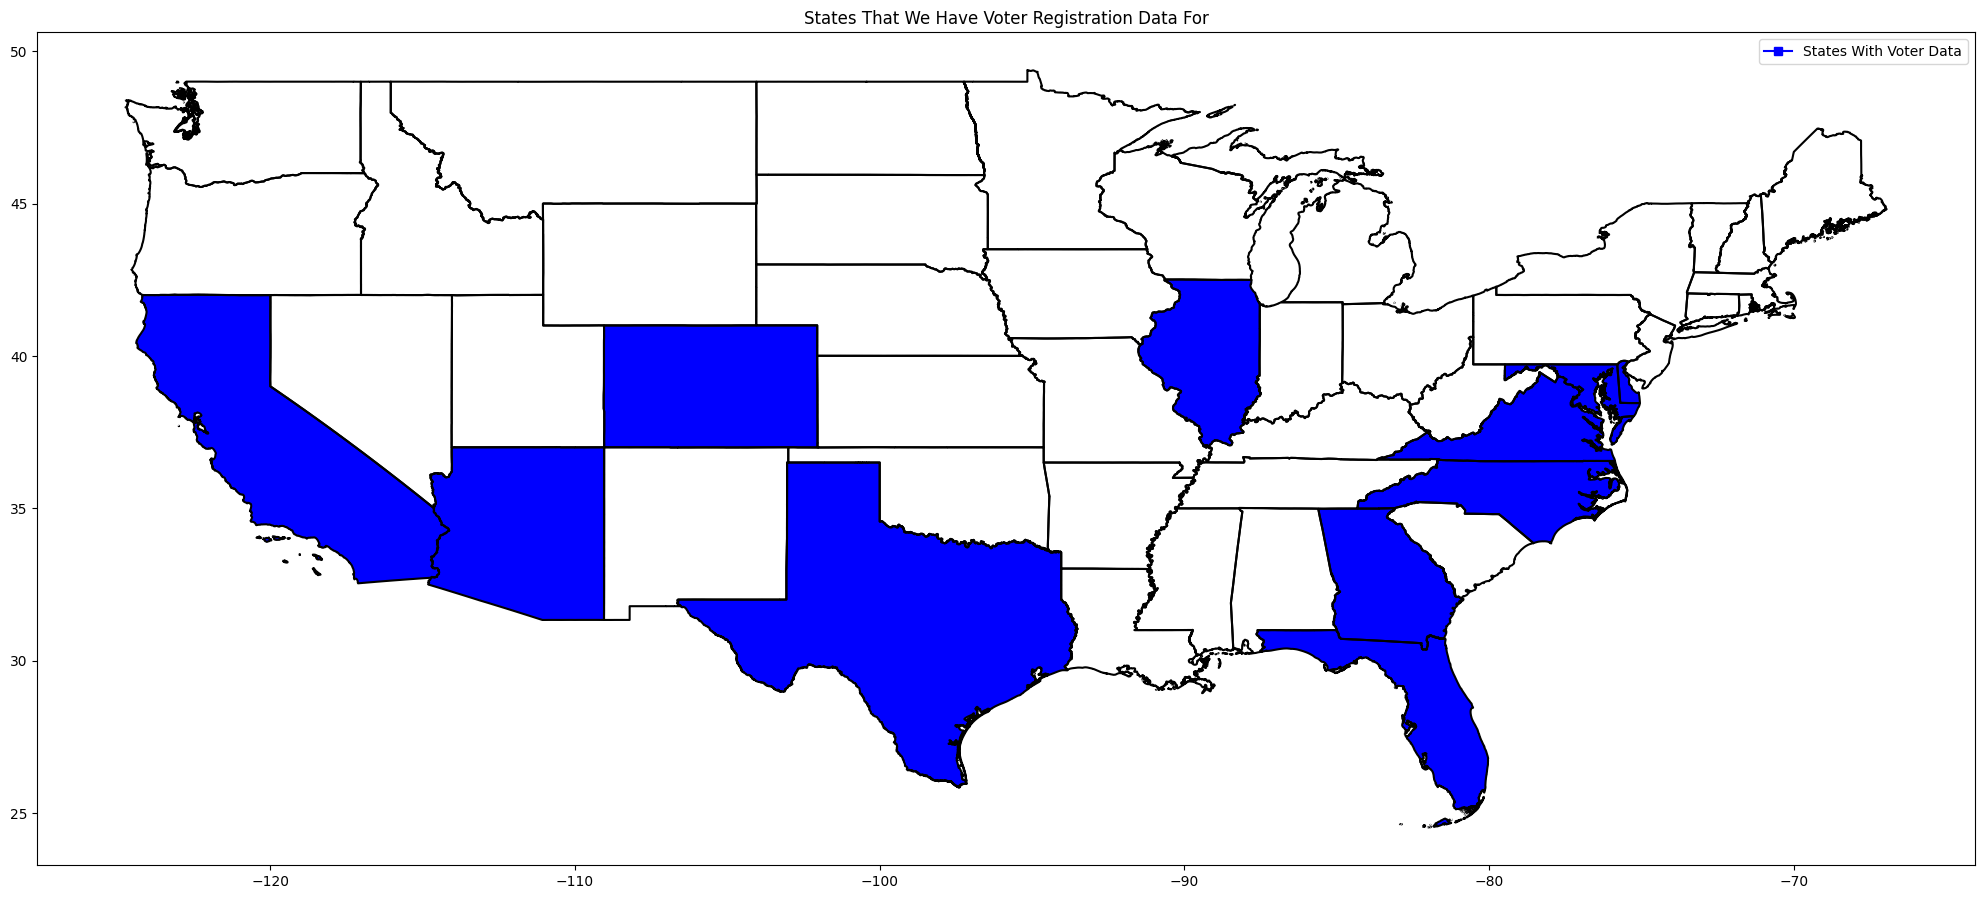

In [49]:
us_map=bbox.boundary.plot(figsize=(25,15),color="black")
combined.plot(ax=us_map,color="blue",linewidth=.25)
plt.title("States That We Have Voter Registration Data For")
plt.plot([], [], color='blue', label='States With Voter Data', marker='') #dummy plot to create a legend
plt.legend()
plt.show()

Above is a map that highlights all the states we have registration voter for highlighted in blue.

There were multiple insights we were able to gleam from this notebook. One major takeaway is that there are major outliers in voter registrations from states. For example, California and Texas had so much more new voters registers it skewed the mean new voter in a month so there were significantly fewer months above the mean then below the mean. Another key insight is that voter registration decreased from 2016 to 2020. This could be in large part due to the COVID-19 pandemic making it more challenge to register to vote.

Some suggestions I would offer to a client is to increase staffing in the first couple months of the year. These months have the highest amount of new registered voters so more employees at those times would help greatly. Even without the pandemic, 2016 shows the total new registered voters slowly dropping throughout the months. So I would advise to slowly reduce staffing as it gets into the summer.

There are multiple next steps that could be made from this startpoint in regards to this data. The biggest problem with the dataset is it uses raw new registered voter information. This makes it so comparing data between states is useless as it just represents total population. I would import population data from the states and use it to make a registered voters per capita column to do more analysis with.

Github Link:https://github.com/Ngilbert0807/Gilbert_Nathaniel_325_Midterm

Academic Integrity Statement
By writing my name in the cell below, I certify that:

I did not use resources other than:
the Python notebooks provided by the instructor,
links provided in this notebook,
the assigned readings, and
my own personal notes
This means that I did not:
look up anything on Google, or Stack Overflow, Chatgpt, &c.,
discuss the content of the exam with anyone other than the instructors or TAs, or
do anything that technically doen't break these rules but is against their spirit.

Nathaniel Gilbert